# K-Nearest Neighbours for Regression


In [1]:
# Importing Libraries
import pandas as pd
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tabulate
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Preparing 'Automobole' Dataset
dataset = pd.read_csv('KNN_Automobile_Data.csv')
dataset = dataset.replace("?", pd.np.nan)
X = dataset.iloc[:,:-1] # 25 Independent Variables
print("X-Shape", X.shape)
Y = dataset.iloc[:,-1] # 1 Dependent Variable i.e. Price
print("Y-Shape", Y.shape)
#print(X.isnull().sum()) # Summary of Missing Values

X-Shape (205, 25)
Y-Shape (205,)


In [3]:
# Data Pre-Processing
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # Imputer: Mean
X['normalized-losses'] = imputer.fit_transform(X[['normalized-losses']]).ravel()
X['num-of-doors'] = X['num-of-doors'].replace(pd.np.nan, 'four')
X['bore'] = imputer.fit_transform(X[['bore']]).ravel()
X['stroke'] = imputer.fit_transform(X[['stroke']]).ravel()
X['horsepower'] = imputer.fit_transform(X[['horsepower']]).ravel()
X['peak-rpm'] = imputer.fit_transform(X[['peak-rpm']]).ravel()

cat_columns = [2, 3, 4, 5, 6, 7, 8, 14, 15, 17] # Column Numbers of Categorical Variables
le = LabelEncoder()
for col in cat_columns:
    X[X.columns[col]] = le.fit_transform(X[X.columns[col]])
    
ohe = OneHotEncoder(categorical_features = cat_columns)
X = ohe.fit_transform(X).toarray() 

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
print(X_train.shape)

(164, 75)


In [4]:
# Preparing Parameters
K_values = [5, 9, 11] # 5 <= k <= sqrt(X_train.shape[0])
P_values = [1,2] # Distance Metrics
table = []

In [5]:
# K-Nearest Neighbours Algorithm
for k, dm in list(product(K_values, P_values)):
    regressor = KNeighborsRegressor(n_neighbors = k, p = dm)
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = round(sqrt(mse), 2)
    score = round(r2_score(Y_test,Y_pred), 2)
    table.append((k, dm, rmse, score))

In [6]:
# Tabulation of Results
headers = ['Neighbours', 'Value of p', 'RMSE', 'R2 Score']
tabulate.tabulate(table, headers, tablefmt='html', numalign='center', showindex='always')

,Neighbours,Value of p,RMSE,R2 Score
0,5,1,3945.17,0.81
1,5,2,4729.22,0.73
2,9,1,5162.93,0.67
3,9,2,5563.15,0.62
4,11,1,5337.23,0.65
5,11,2,5970.58,0.56


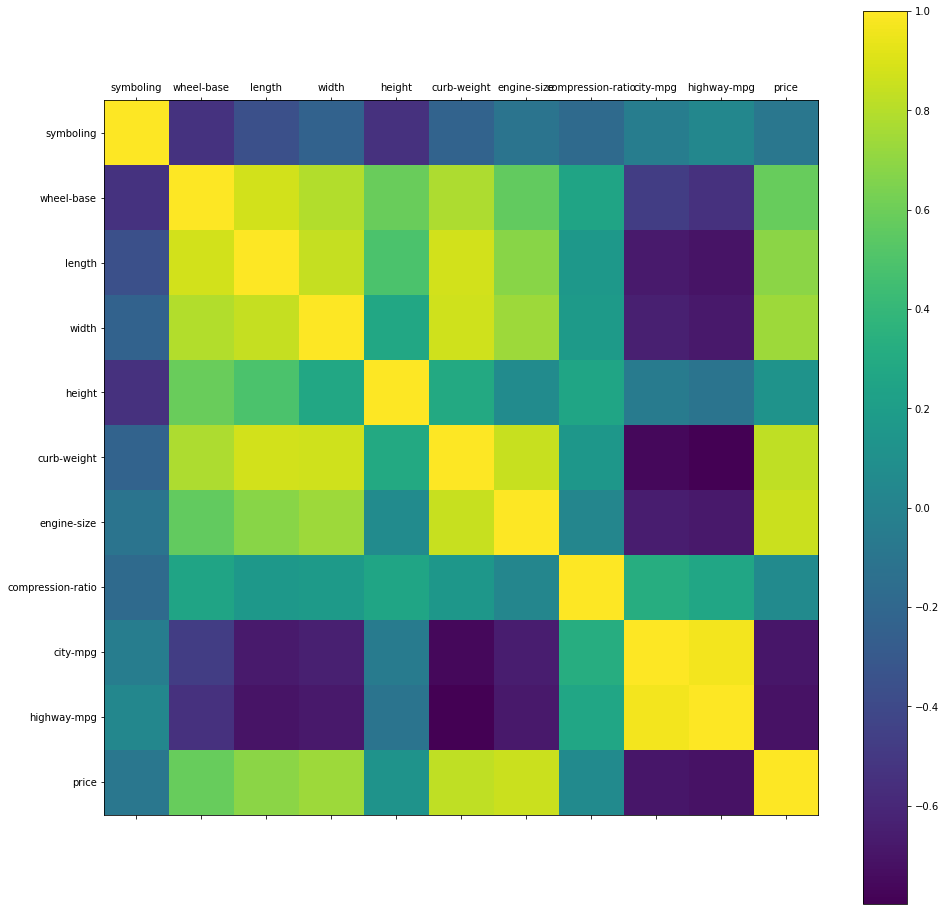

In [7]:
# Pearson Correlation
pearsoncorr = dataset.corr(method='pearson')
rcParams['figure.figsize'] = 12, 16
plt.matshow(pearsoncorr)
plt.yticks(np.arange(len(pearsoncorr.columns)), pearsoncorr.columns)
plt.xticks(np.arange(len(pearsoncorr.columns)), pearsoncorr.columns)
plt.colorbar()